<a href="https://colab.research.google.com/github/Sharath2424/Data-Science-projects/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependancies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [52]:
from google.colab import files
upload= files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (3).csv


In [53]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
df.isnull().sum()  #Finds missing values.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [57]:
df.describe().T  #Shows some basic stats of numerical data.

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [58]:
df['Churn'].value_counts()    #Let's find the churners count.

No     5174
Yes    1869
Name: Churn, dtype: int64

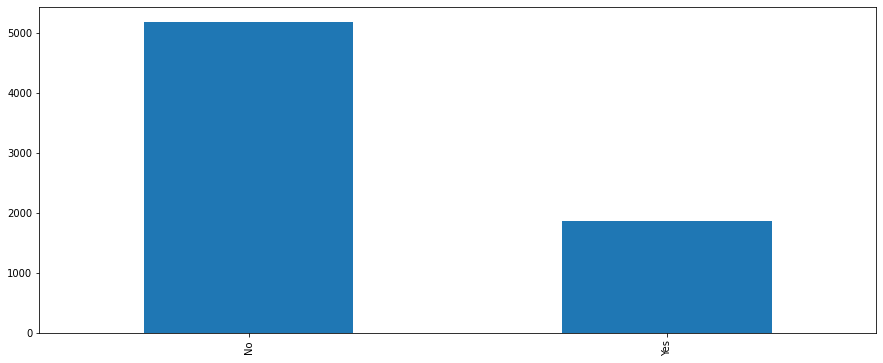

In [59]:
df['Churn'].value_counts().plot(kind= 'bar', figsize= (15,6))

In [60]:
num_retained= df[df.Churn== 'No'].shape[0]  #Customers who stayed with the company.
num_churned= df[df.Churn== 'Yes'].shape[0]  #Customers who left the company.

print(num_retained/ (num_retained + num_churned) * 100,'% of customers stayed with the company.')
print(num_churned/ (num_retained + num_churned) * 100,'% of customers left the company.')

73.4630129206304 % of customers stayed with the company.
26.536987079369588 % of customers left the company.


The dataset is unbalanced.

Churners by gender

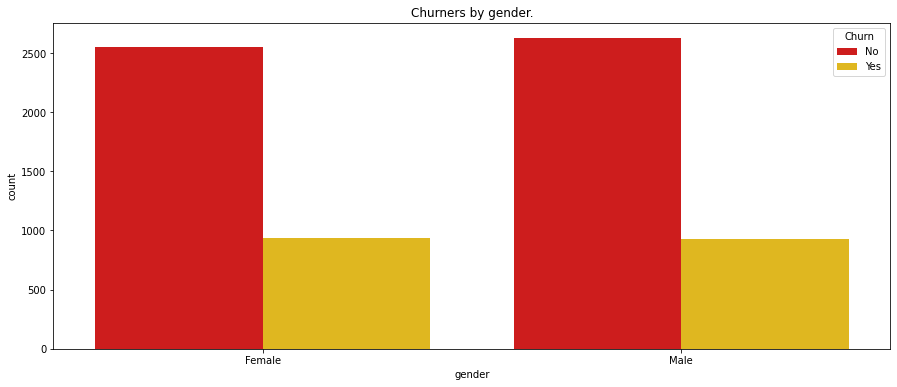

In [61]:
plt.figure(figsize= (15,6))
plt.title('Churners by gender.')
sns.countplot(df['gender'], hue= df['Churn'], data= df, palette= 'hot')
plt.show()

Churners by internet service type

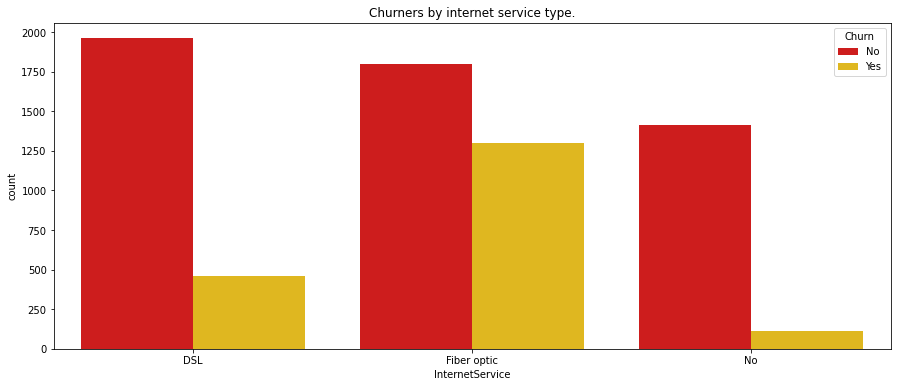

In [62]:
plt.figure(figsize= (15,6))
plt.title('Churners by internet service type.')
sns.countplot(df['InternetService'], hue= df['Churn'], data= df, palette= 'hot')
plt.show()

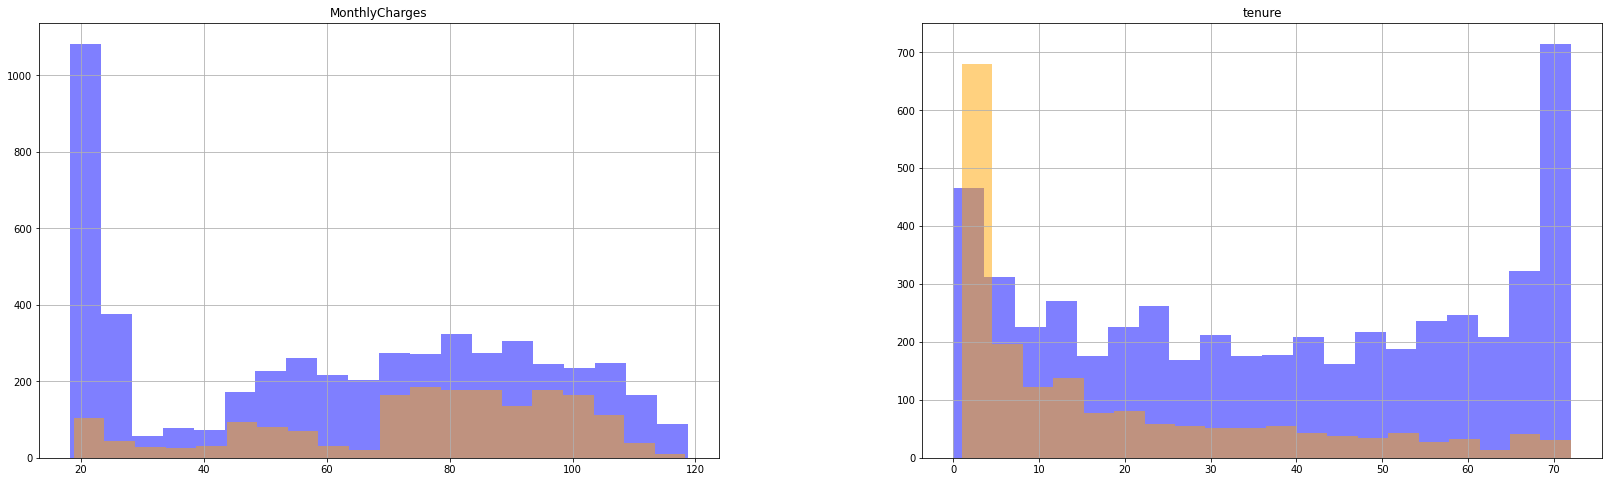

In [63]:
num_features= ['MonthlyCharges', 'tenure']
fig, ax= plt.subplots(1, 2, figsize=(28,8))
df[df.Churn=='No'][num_features].hist(bins=20,color= 'blue', alpha= 0.5, ax=ax)
df[df.Churn=='Yes'][num_features].hist(bins=20,color= 'orange',alpha= 0.5, ax=ax)
plt.show()

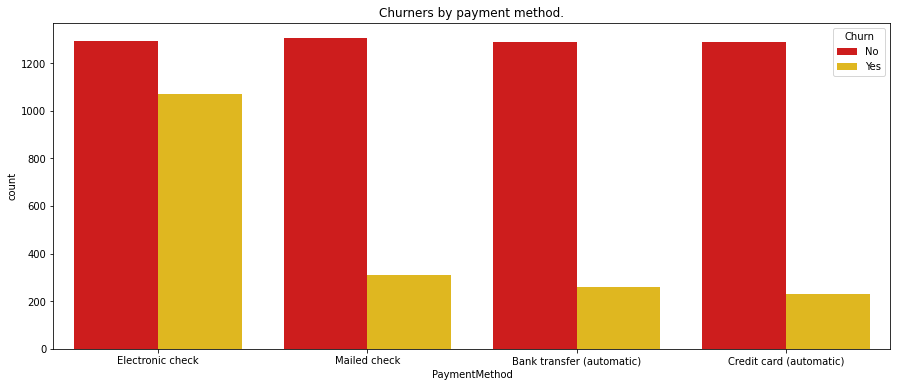

In [64]:
plt.figure(figsize= (15,6))
plt.title('Churners by payment method.')
sns.countplot(df['PaymentMethod'], hue= df['Churn'], data= df, palette= 'hot')
plt.show()

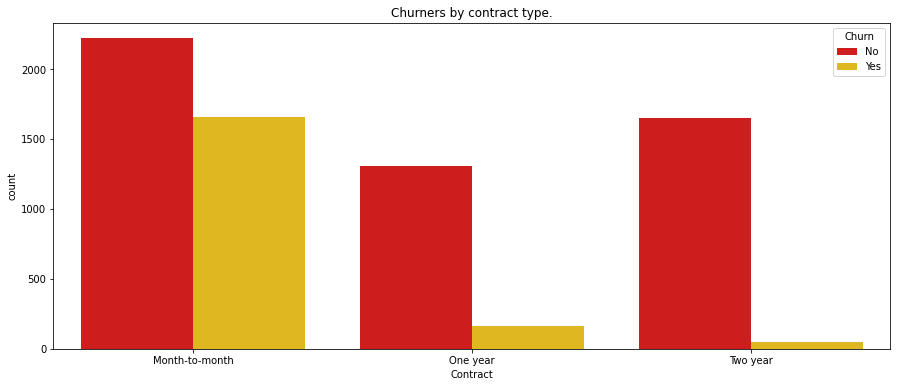

In [65]:
plt.figure(figsize= (15,6))
plt.title('Churners by contract type.')
sns.countplot(df['Contract'], hue= df['Churn'], data= df, palette= 'hot')
plt.show()

In [66]:
cleaned_df= df.drop('customerID', axis= 1)

In [67]:
cleaned_df.shape

(7043, 20)

In [68]:
#Convert all categorical values to numeric.
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number:
    continue
  cleaned_df[column]= LabelEncoder().fit_transform(cleaned_df[column])

In [69]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


Encoded data into numerical form.

In [70]:
#Split data.
X= cleaned_df.drop('Churn', axis= 1)
y= cleaned_df['Churn']

X= StandardScaler().fit_transform(X)  #Apply StandardScaler to X data.

In [71]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)

Model building


Logistic regression

In [72]:
#Call the model.
lg= LogisticRegression()

#Train the model.
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred= lg.predict(X_test)

Confusion matrix

[[938 103]
 [184 184]]


Text(33.0, 0.5, 'True')

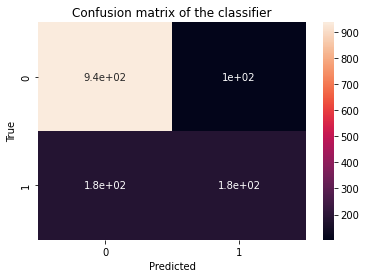

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')


Classification report

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.50      0.56       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



Decision tree classifier

In [76]:
#Call the model.
dt= DecisionTreeClassifier()

#Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
y_pred= dt.predict(X_test)

Confusion matrix

[[843 198]
 [187 181]]


Text(33.0, 0.5, 'True')

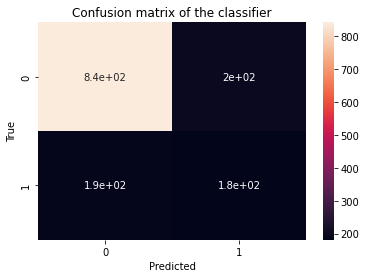

In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')


Classification report

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1041
           1       0.48      0.49      0.48       368

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



Random forest classifier

In [80]:
#Call the model.
rf= RandomForestClassifier()

#Train the model.
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
y_pred= rf.predict(X_test)

Confusion matrix

[[920 121]
 [190 178]]


Text(33.0, 0.5, 'True')

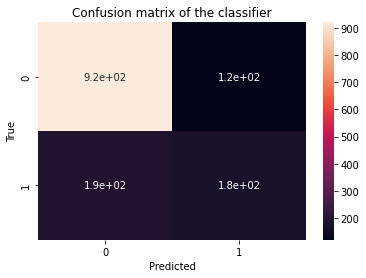

In [82]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Classification report

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.60      0.48      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



Observations:

 Logistic regression has achieved accuracy of 80% which is better when compared to other models.